In [ ]:
!pip install pandas numpy seaborn matplotlib plotly sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, mean_squared_error


In [117]:
df = pd.read_excel("/Users/likhithkanigolla/IIITH/code-files/Digital-Twin/ZF/Soil_test/Soil Data.xlsx")
df = df.drop(columns=["entry_id","tdsValue_without_temp","Voltage"])
df.head()

,Temp,tdsValue,Quantity,Soil
0,29.9375,275.95312,1,0
1,29.8750,278.30084,1,0
2,29.7500,287.14365,1,0
3,29.6875,279.20163,1,0
4,29.1875,291.01865,1,0


In [118]:
df.columns
print("Columns:", df.columns)

df.describe()
print("Description: ",df.describe())

df.info()
print("Info", df.info())

df.isnull().sum()
print("Null Values:", df.isnull().sum())

Columns: Index(['Temp', 'tdsValue', 'Quantity', 'Soil '], dtype='object')
Description:                Temp     tdsValue     Quantity        Soil 
count  1626.000000  1626.000000  1626.000000  1626.000000
mean     26.278137   341.108962     1.511685   246.186962
std       1.111388    36.820004     0.500017   164.702733
min      24.562500     2.671130     1.000000     0.000000
25%      25.437500   328.106810     1.000000   100.000000
50%      25.937500   346.682250     2.000000   300.000000
75%      27.187500   361.401142     2.000000   400.000000
max      29.937500   433.114870     2.000000   500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      1626 non-null   float64
 1   tdsValue  1626 non-null   float64
 2   Quantity  1626 non-null   int64  
 3   Soil      1626 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 50.9 KB

Heat Map: 


<Axes: >

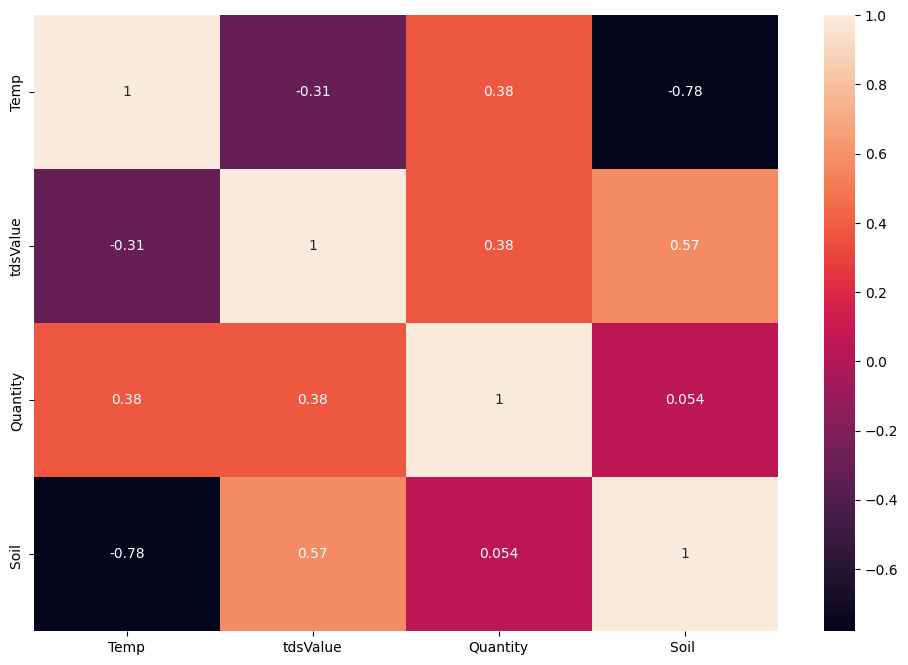

In [119]:
print("Heat Map: ")
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='tdsValue', ylabel='count'>

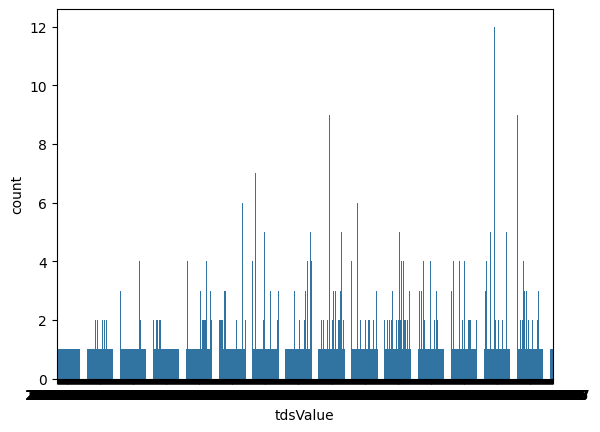

In [120]:
sns.countplot(x="tdsValue", data=df)

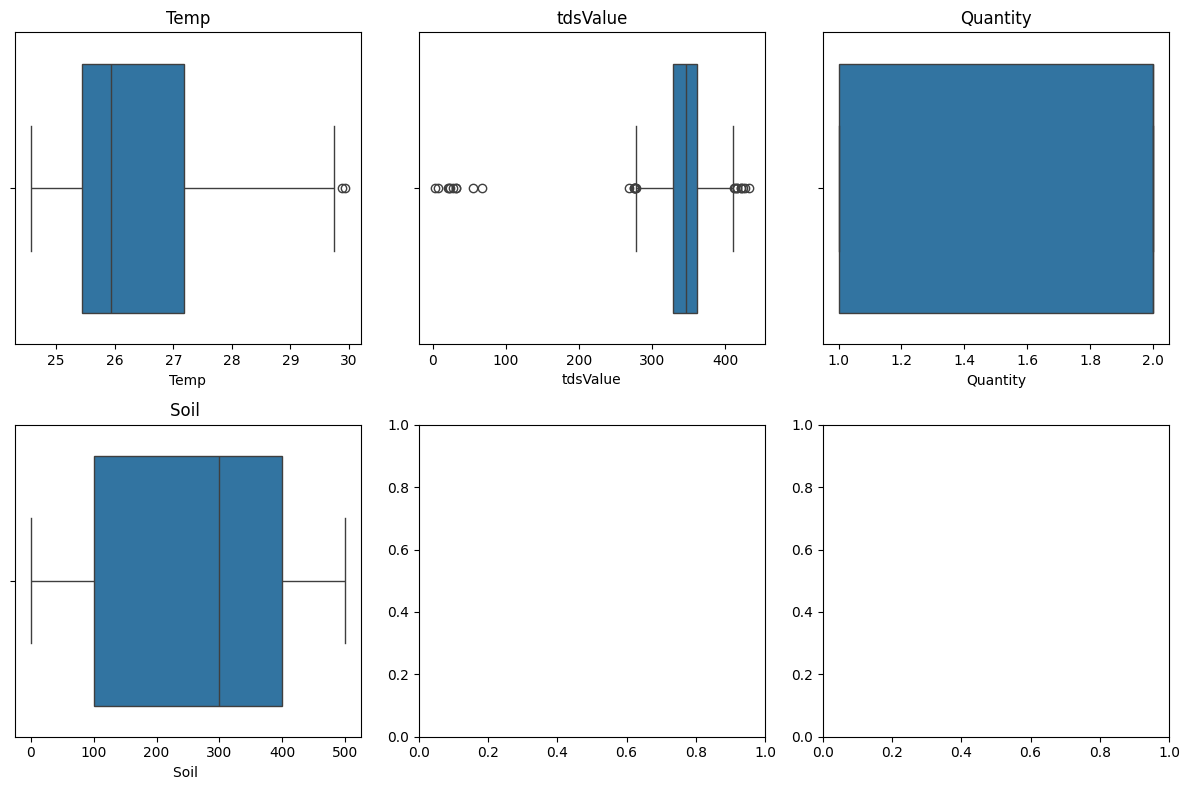

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(df.columns):
    sns.boxplot(x=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()


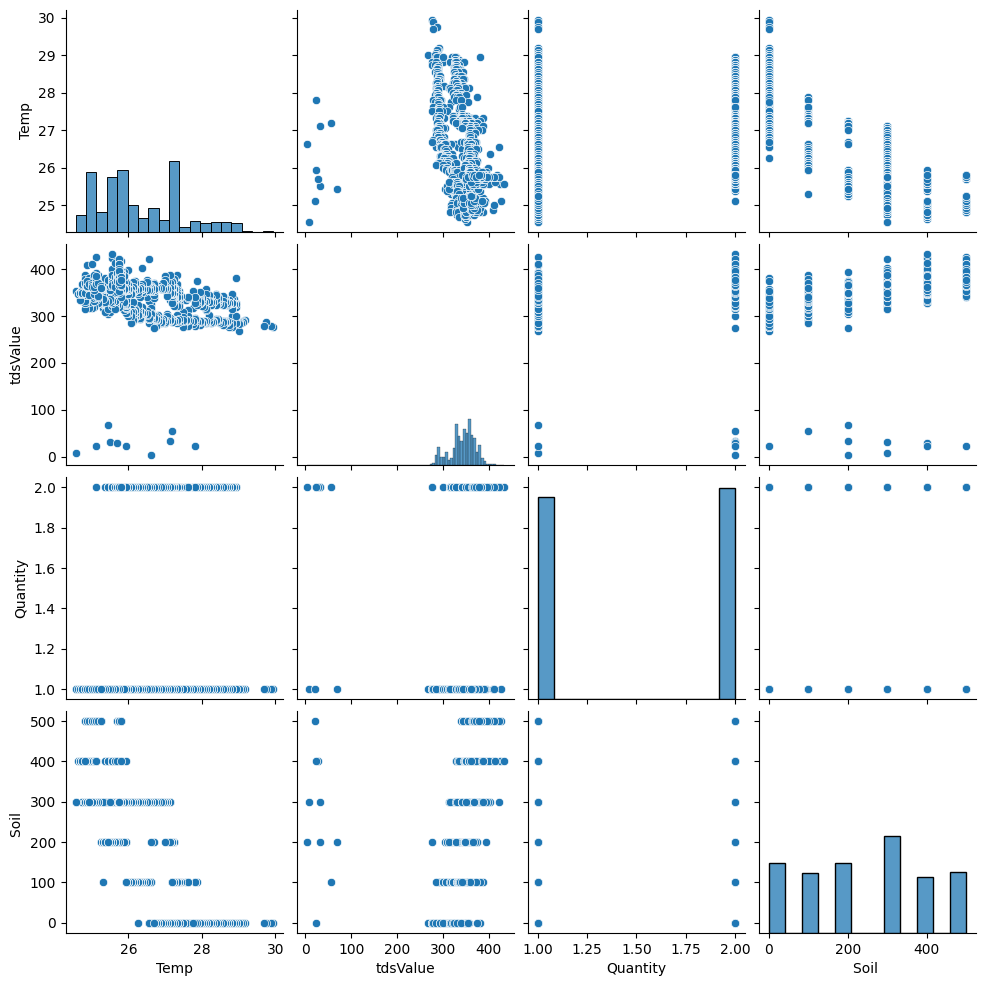

In [122]:
sns.pairplot(df)

In [124]:
x = df.drop("tdsValue", axis=1)
y = df["tdsValue"]

In [125]:
x.shape, y.shape

((1626, 3), (1626,))

In [126]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 3.29361886, -1.02364981, -1.49519498],
       [ 3.23736559, -1.02364981, -1.49519498],
       [ 3.12485904, -1.02364981, -1.49519498],
       ...,
       [-0.41909728,  0.97689658,  1.54151129],
       [-0.47535055,  0.97689658,  1.54151129],
       [-0.41909728,  0.97689658,  1.54151129]])

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
x_train.shape, x_test.shape

((1300, 3), (326, 3))

In [129]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## **Logistic Regression**

In [ ]:
#Logistic Regression
#Take Value of Sand to test this
#object creation
model_log_r= LogisticRegression()


In [ ]:
model_log_r.fit(x_train, y_train)

In [ ]:
#Making Prediction
pred_log_r = model_log_r.predict(x_test)

In [ ]:
#accuracy score
accuracy_score_log = accuracy_score(y_test,pred_log_r)
accuracy_score_log

In [ ]:
#Decision Tree

## **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 8)

In [ ]:
model_dt.fit(x_train, y_train)

In [ ]:
pred_dt = model_dt.predict(x_test)

In [ ]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
cm2
# sns.heatmap(cm2/np.sum(cm2))

## **Linear Regression**

In [135]:
model_lin_r = LinearRegression()
model_lin_r.fit(x_train, y_train)
y_pred_lr = model_lin_r.predict(x_test)
# print(pred_lin_r)

mse_lr = mean_squared_error(y_test,y_pred_lr)
intercept = model_lin_r.intercept_
coefficients = model_lin_r.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(len(coefficients))




Linear Regression Equation:
3


## **Polynomial Regression**

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming x_train, x_test, y_train, y_test are already defined

# deg = 8
# for i in range(1,deg):
#     poly_features = PolynomialFeatures(degree=i+1)

#     x_poly_train = poly_features.fit_transform(x_train)
#     x_poly_test = poly_features.transform(x_test)

#     poly_regressor = LinearRegression()
#     poly_regressor.fit(x_poly_train, y_train)
#     y_pred_pr = poly_regressor.predict(x_poly_test)

#     mse_pr = mean_squared_error(y_test, y_pred_pr)
#     print("Mean Squared Error:",i," ",mse_pr)

poly_features = PolynomialFeatures(degree=6)

x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly_train, y_train)
y_pred_pr = poly_regressor.predict(x_poly_test)

mse_pr = mean_squared_error(y_test, y_pred_pr)
print("Mean Squared Error:",mse_pr)

intercept = poly_regressor.intercept_
coefficients = poly_regressor.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
# print(coefficients)





Mean Squared Error: 996.8787817669004
Linear Regression Equation:


## **Random Forest Regressor**

Mean Squared Error: 1038.147541047249


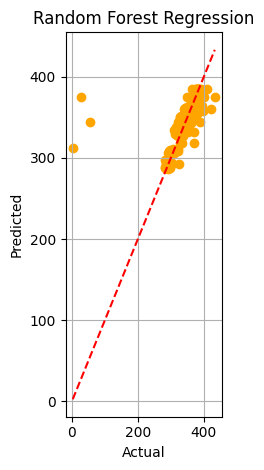

In [146]:
from sklearn.ensemble import RandomForestRegressor

# TESTED TILL 30
# depth =30
# for i in range(depth):
#     rf_regressor = RandomForestRegressor(random_state=42, max_depth = i+1)
#     rf_regressor.fit(x_train, y_train)
#     y_pred_rf = rf_regressor.predict(x_test)

#     mse_rfr = mean_squared_error(y_test, y_pred_rf)
#     print("Mean Squared Error:",i+1 ," Depth: ", mse_rfr)

rf_regressor = RandomForestRegressor(random_state=42, max_depth = 7)
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)

mse_rfr = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rfr)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

In [131]:
import joblib

# Assuming your Random Forest model is stored in the variable rf_regressor
joblib.dump(rf_regressor, 'soil_random_forest_model.pkl')

['soil_random_forest_model.pkl']

In [133]:
import joblib

# Load the model from the file
model = joblib.load('soil_random_forest_model.pkl')

# temp, quantity, sand 
# Make predictions on new data
new_data = [[35.906,89068,8904]]
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)

print(predictions)


# Assuming you have the test data stored in X_test and y_test variables
# Make predictions on the test data
y_pred = model.predict(x_test)
print(x_test)
print(y_pred)


[311.51376334]
[[ 2.22480664  0.97689658 -1.49519498]
 [ 0.76222149  0.97689658  0.32682878]
 [-0.75661692  0.97689658  0.93417004]
 [ 0.3121953   0.97689658  0.32682878]
 [-0.41909728 -1.02364981 -0.28051247]
 [ 0.87472804  0.97689658 -0.28051247]
 [-1.2628964  -1.02364981  1.54151129]
 [ 1.43726079  0.97689658 -1.49519498]
 [-0.41909728  0.97689658  1.54151129]
 [ 1.43726079 -1.02364981 -1.49519498]
 [-0.47535055  0.97689658  1.54151129]
 [-0.8128702  -1.02364981 -0.28051247]
 [-0.64411038 -1.02364981  0.32682878]
 [-0.53160383  0.97689658  1.54151129]
 [-0.64411038  0.97689658  0.93417004]
 [-0.362844    0.97689658  0.32682878]
 [-0.64411038 -1.02364981 -0.28051247]
 [-0.8128702  -1.02364981 -0.28051247]
 [-0.1378309  -1.02364981 -0.88785373]
 [-1.15038985 -1.02364981  0.32682878]
 [ 0.70596822 -1.02364981 -1.49519498]
 [-0.30659073  0.97689658  0.32682878]
 [ 0.36844857  0.97689658  0.32682878]
 [-1.2628964  -1.02364981  1.54151129]
 [ 0.81847477  0.97689658 -0.28051247]
 [-0.64411

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Decision Tree Regression**

Mean Squared Error: 958.1570964380627


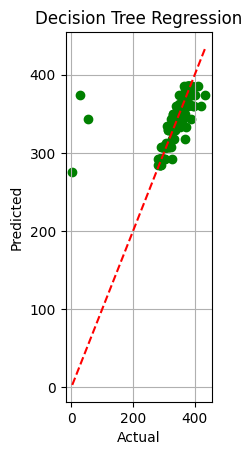

In [160]:
from sklearn.tree import DecisionTreeRegressor

# #TESTED TILL 30
# depth =30
# for i in range(depth):
#     dt_regressor = DecisionTreeRegressor(random_state=99, max_depth = i+1)
#     dt_regressor.fit(x_train, y_train)
#     y_pred_dt = dt_regressor.predict(x_test)
#     mse_dtr = mean_squared_error(y_test, y_pred_dt)
#     print("Mean Squared Error:",i+1, " Depth:---- ",mse_dtr)


dt_regressor = DecisionTreeRegressor(random_state=99, max_depth = 5)
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)
mse_dtr = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dtr)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')
plt.grid(True)

In [161]:
import joblib

# Assuming your model is named "model"
joblib.dump(dt_regressor, "soil_decision_tree_model.pkl")

['soil_decision_tree_model.pkl']

## **KNeighborsRegressor**

Mean Squared Error: 1027.3086152204648


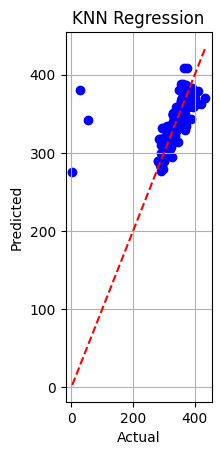

In [145]:
from sklearn.neighbors import KNeighborsRegressor
k = 1
#TESTED TILL 30
# for i in range(k):
#     knn_regressor = KNeighborsRegressor(n_neighbors=i+1)
#     knn_regressor.fit(x_train, y_train)
#     y_pred_knn = knn_regressor.predict(x_test)
#     mse_knn = mean_squared_error(y_test, y_pred_knn)
#     print("Mean Squared Error:", i+1 , "Neib",mse_knn)


knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(x_train, y_train)
y_pred_knn = knn_regressor.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression')
plt.grid(True)

## **TEST RESULTS**

In [ ]:
%pip install tabulate

In [159]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_pr = mean_squared_error(y_test, y_pred_pr)

# Calculate RMSE for each model
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)
rmse_knn = np.sqrt(mse_knn)
rmse_pr = np.sqrt(mse_pr)

# Calculate R2 score for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_knn = r2_score(y_test, y_pred_knn)
r2_pr = r2_score(y_test, y_pred_pr)

data = [
    ["Linear Regression", mse_lr, rmse_lr, r2_lr],
    ["Random Forest Regression", mse_rf, rmse_rf, r2_rf],
    ["Decision Tree Regression", mse_dt, rmse_dt, r2_dt],
    ["KNN Regression", mse_knn, rmse_knn, r2_knn],
    ["Polynomial Regression", mse_pr, rmse_pr, r2_pr]
]

# Define table headers
headers = ["Regression Model", "MSE", "RMSE", "R-squared"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="pretty"))



+--------------------------+--------------------+--------------------+---------------------+
|     Regression Model     |        MSE         |        RMSE        |      R-squared      |
+--------------------------+--------------------+--------------------+---------------------+
|    Linear Regression     | 1096.150488183664  | 33.108163467393716 | 0.34554971002965584 |
| Random Forest Regression | 1038.147541047249  | 32.22029703536653  | 0.38018003313014703 |
| Decision Tree Regression | 975.3569558355845  | 31.23070533682492  | 0.41766878776936955 |
|      KNN Regression      | 1027.3086152204648 | 32.05165542090556  | 0.38665135091613834 |
|  Polynomial Regression   | 996.8787817669004  | 31.573387239365058 | 0.40481930644971986 |
+--------------------------+--------------------+--------------------+---------------------+
